# Use pure Pytorch tensor with high level primitives to build a neural network



In [155]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generate sample data

In [156]:
def get_true_labels(X, weights_true, bias_true):
  return tf.matmul(3 * X ** 2, weights_true, transpose_b=True) + tf.matmul(X, weights_true, transpose_b=True) + tf.transpose(bias_true)

In [157]:
n_samples = 150
input_dim = 3
output_dim = 2

tf.random.set_seed(123)
X = tf.random.uniform((n_samples, input_dim), -1, 1)
print('Sample X: ' + str(X[:2]))

weights_true = tf.constant([[5., 1., -10.], [-2., -6., 2.]], dtype=tf.float32)
bias_true = tf.constant([[1], [-1]], dtype=tf.float32)

y_true = get_true_labels(X, weights_true, bias_true)
print('Sample y: ' + str(y_true[:2]))

Sample X: tf.Tensor(
[[-0.7476938   0.14550257 -0.4013734 ]
 [ 0.09236717  0.44103146  0.5779066 ]], shape=(2, 3), dtype=float32)
Sample y: tf.Tensor(
[[  5.036951   -3.9491248]
 [-13.183979   -4.2236013]], shape=(2, 2), dtype=float32)


# Plot data

In [158]:
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

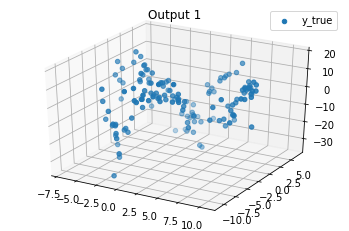

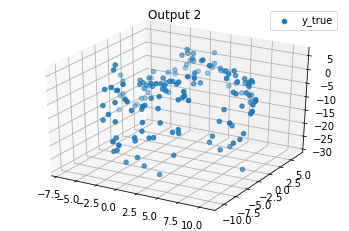

In [159]:
plot_3d('Output 1', X, y_true[:,0])
plot_3d('Output 2', X, y_true[:,1])

# Build neural network
 

In [160]:
class NeuralNet(tf.keras.Model):
  def __init__(self, num_inputs=3, num_hidden=[2], num_outputs=2, activation=None, **kwargs):
    super(NeuralNet, self).__init__(**kwargs)
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs = num_outputs

    layers_nodes = [self.num_inputs] + self.num_hidden + [self.num_outputs]
    
    layers = []
    for i in range(len(layers_nodes[:-1])):
      # Don't add activation function to last layer because this is a regression problem
      if i == len(layers_nodes[:-1]) - 1:
        layers.append(Dense(layers_nodes[i + 1]))
      else:
        layers.append(Dense(layers_nodes[i + 1], activation=activation))

    self.layers_ = layers

  def forward(self, x):
    curr_out = X
    for layer in self.layers_:
      curr_out = layer(curr_out)
    return curr_out
  
  def call(self, inputs):
    curr_out = X
    for layer in self.layers_:
      curr_out = layer(curr_out)
    return curr_out
  
  def fit(self, X, y_true, lr, epochs):
    loss_fn  = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam()
    for epoch in range(epochs):
      with tf.GradientTape(persistent=True) as tape:
        y_pred = self.forward(X)
        error = loss_fn(y_pred, y_true)
        print(error)

      for layer in self.layers:
        gradients = tape.gradient(error, layer.trainable_weights)
        optimizer.apply_gradients(zip(gradients, layer.trainable_weights))

# Define hyperparameters

In [161]:
epochs = 1500
lr = 0.05

n_inputs = X.shape[1]
n_outputs = y_true.shape[1]

# Train neural network **with** ReLU activation

In [162]:
model = NeuralNet(num_inputs=n_inputs, num_hidden=[4, 3], num_outputs=n_outputs, activation='relu')
print('Neural Network Architecture:')
print(model.layers)
print()

model.fit(X, y_true, lr, epochs)

y_pred = model.forward(X)
err = mean_squared_error(y_true, y_pred)
print('Final Error: {}'.format(err))

Neural Network Architecture:
[<tensorflow.python.keras.layers.core.Dense object at 0x7f27c0c9eed0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f27c0b76d50>, <tensorflow.python.keras.layers.core.Dense object at 0x7f27c0cd65d0>]

tf.Tensor(125.29641, shape=(), dtype=float32)
tf.Tensor(125.28149, shape=(), dtype=float32)
tf.Tensor(125.26653, shape=(), dtype=float32)
tf.Tensor(125.25057, shape=(), dtype=float32)
tf.Tensor(125.23354, shape=(), dtype=float32)
tf.Tensor(125.215454, shape=(), dtype=float32)
tf.Tensor(125.19627, shape=(), dtype=float32)
tf.Tensor(125.17621, shape=(), dtype=float32)
tf.Tensor(125.155235, shape=(), dtype=float32)
tf.Tensor(125.1334, shape=(), dtype=float32)
tf.Tensor(125.110886, shape=(), dtype=float32)
tf.Tensor(125.08758, shape=(), dtype=float32)
tf.Tensor(125.063545, shape=(), dtype=float32)
tf.Tensor(125.03886, shape=(), dtype=float32)
tf.Tensor(125.0136, shape=(), dtype=float32)
tf.Tensor(124.98797, shape=(), dtype=float32)
tf.Tensor(124.96207, 

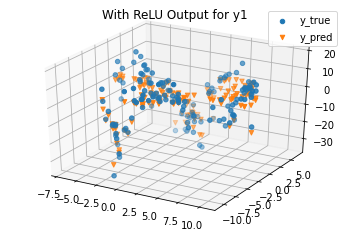

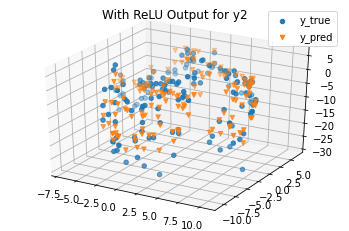

In [163]:
plot_3d('With ReLU Output for y1', X, y_true[:,0], y_pred[:,0])
plot_3d('With ReLU Output for y2', X, y_true[:,1], y_pred[:,1])

# Train neural network **without** ReLU activation
We can see the error is much larger than the model trained with a nonlinear activation function and the resulting prediction plot does not look as close to the true values compared to the plot with ReLU.

In [164]:
model = NeuralNet(num_inputs=n_inputs, num_hidden=[4, 3], num_outputs=n_outputs, activation=None)
print('Neural Network Architecture:')
print(model)
print()

model.fit(X, y_true, lr, epochs)

y_pred = model.forward(X)
err = mean_squared_error(y_true, y_pred)
print('Final Error: {}'.format(err))

Neural Network Architecture:

tf.Tensor(121.35108, shape=(), dtype=float32)
tf.Tensor(121.28121, shape=(), dtype=float32)
tf.Tensor(121.22019, shape=(), dtype=float32)
tf.Tensor(121.15668, shape=(), dtype=float32)
tf.Tensor(121.08913, shape=(), dtype=float32)
tf.Tensor(121.01707, shape=(), dtype=float32)
tf.Tensor(120.9403, shape=(), dtype=float32)
tf.Tensor(120.85886, shape=(), dtype=float32)
tf.Tensor(120.77277, shape=(), dtype=float32)
tf.Tensor(120.68219, shape=(), dtype=float32)
tf.Tensor(120.587265, shape=(), dtype=float32)
tf.Tensor(120.488174, shape=(), dtype=float32)
tf.Tensor(120.385155, shape=(), dtype=float32)
tf.Tensor(120.27836, shape=(), dtype=float32)
tf.Tensor(120.16801, shape=(), dtype=float32)
tf.Tensor(120.05428, shape=(), dtype=float32)
tf.Tensor(119.93742, shape=(), dtype=float32)
tf.Tensor(119.81753, shape=(), dtype=float32)
tf.Tensor(119.69482, shape=(), dtype=float32)
tf.Tensor(119.56945, shape=(), dtype=float32)
tf.Tensor(119.441574, shape=(), dtype=float32)
t

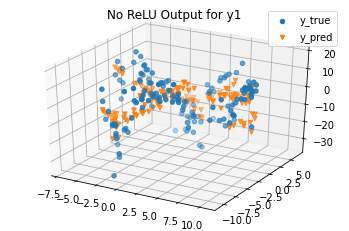

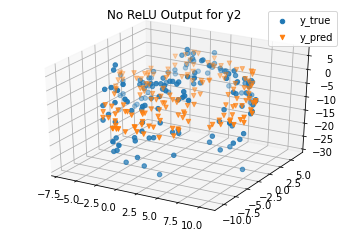

In [165]:
plot_3d('No ReLU Output for y1', X, y_true[:,0], y_pred[:,0])
plot_3d('No ReLU Output for y2', X, y_true[:,1], y_pred[:,1])